In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49ffe352a5fc9c5531d55e46e47e2f49


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yerbogachen
Processing Record 2 of Set 1 | menton
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | veraval
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | shieli
Processing Record 9 of Set 1 | tocopilla
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | vestmannaeyjar
Processing Record 12 of Set 1 | rio maior
Processing Record 13 of Set 1 | the valley
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | prado
Processing Record 17 of Set 1 | nanortalik
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | waingapu
Processing Record 20 of Set 1 | bonavista
Processing Record 21 of Set 1 | alice springs
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Set 1 | ayorou


Processing Record 37 of Set 4 | lolua
City not found. Skipping...
Processing Record 38 of Set 4 | knysna
Processing Record 39 of Set 4 | lagoa
Processing Record 40 of Set 4 | narsaq
Processing Record 41 of Set 4 | kudahuvadhoo
Processing Record 42 of Set 4 | atambua
Processing Record 43 of Set 4 | moyale
Processing Record 44 of Set 4 | roma
Processing Record 45 of Set 4 | marau
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | sao joao da barra
Processing Record 48 of Set 4 | bethel
Processing Record 49 of Set 4 | torbay
Processing Record 50 of Set 4 | aswan
Processing Record 1 of Set 5 | dhar
Processing Record 2 of Set 5 | saleaula
City not found. Skipping...
Processing Record 3 of Set 5 | kushima
Processing Record 4 of Set 5 | hasaki
Processing Record 5 of Set 5 | basoko
Processing Record 6 of Set 5 | port hedland
Processing Record 7 of Set 5 | hambantota
Processing Record 8 of Set 5 | cumaribo
City not found. Skipping...
Processing Record 9 of Set 5 | ko

Processing Record 27 of Set 8 | tiksi
Processing Record 28 of Set 8 | singapore
Processing Record 29 of Set 8 | rajpur
Processing Record 30 of Set 8 | mastic beach
Processing Record 31 of Set 8 | bajo baudo
City not found. Skipping...
Processing Record 32 of Set 8 | vanavara
Processing Record 33 of Set 8 | vanimo
Processing Record 34 of Set 8 | necochea
Processing Record 35 of Set 8 | sukhobezvodnoye
Processing Record 36 of Set 8 | bontang
Processing Record 37 of Set 8 | paamiut
Processing Record 38 of Set 8 | byron bay
Processing Record 39 of Set 8 | victor harbor
Processing Record 40 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 41 of Set 8 | vostok
Processing Record 42 of Set 8 | maykain
City not found. Skipping...
Processing Record 43 of Set 8 | jiayuguan
Processing Record 44 of Set 8 | skjervoy
Processing Record 45 of Set 8 | svetlaya
Processing Record 46 of Set 8 | tabuk
Processing Record 47 of Set 8 | bacolod
Processing Record 48 of Set 8 | punta alta
Proc

Processing Record 11 of Set 12 | binzhou
Processing Record 12 of Set 12 | gumdag
Processing Record 13 of Set 12 | bandarbeyla
Processing Record 14 of Set 12 | de-kastri
Processing Record 15 of Set 12 | colac
Processing Record 16 of Set 12 | ivangorod
Processing Record 17 of Set 12 | jurm
Processing Record 18 of Set 12 | cacapava do sul
Processing Record 19 of Set 12 | chimore
Processing Record 20 of Set 12 | copiapo
Processing Record 21 of Set 12 | pisco
Processing Record 22 of Set 12 | angoche
Processing Record 23 of Set 12 | patti
Processing Record 24 of Set 12 | nyurba
Processing Record 25 of Set 12 | college
Processing Record 26 of Set 12 | chara
Processing Record 27 of Set 12 | saint-joseph
Processing Record 28 of Set 12 | arrifes
Processing Record 29 of Set 12 | mareeba
Processing Record 30 of Set 12 | fevralsk
City not found. Skipping...
Processing Record 31 of Set 12 | gubskaya
Processing Record 32 of Set 12 | conakry
Processing Record 33 of Set 12 | satka
Processing Record 34 

In [8]:
len(city_data)

570

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yerbogachen,61.28,108.01,2.97,93,85,8.05,RU,2020-11-26 17:42:25
1,Menton,43.78,7.50,55.40,76,40,6.93,FR,2020-11-26 17:42:26
2,Vaini,-21.20,-175.20,75.20,94,20,8.05,TO,2020-11-26 17:42:27
3,Kapaa,22.08,-159.32,71.60,94,90,8.05,US,2020-11-26 17:42:27
4,Qaanaaq,77.48,-69.36,-9.63,70,3,3.65,GL,2020-11-26 17:42:27
5,Veraval,20.90,70.37,76.66,42,29,15.68,IN,2020-11-26 17:42:28
6,Anadyr,64.75,177.48,10.40,85,0,13.42,RU,2020-11-26 17:42:28
7,Shieli,44.17,66.75,36.66,75,100,6.08,KZ,2020-11-26 17:42:28
8,Tocopilla,-22.09,-70.20,67.78,55,90,2.82,CL,2020-11-26 17:42:28
9,Souillac,-20.52,57.52,75.20,78,40,6.93,MU,2020-11-26 17:42:29


In [10]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yerbogachen,RU,2020-11-26 17:42:25,61.28,108.01,2.97,93,85,8.05
1,Menton,FR,2020-11-26 17:42:26,43.78,7.50,55.40,76,40,6.93
2,Vaini,TO,2020-11-26 17:42:27,-21.20,-175.20,75.20,94,20,8.05
3,Kapaa,US,2020-11-26 17:42:27,22.08,-159.32,71.60,94,90,8.05
4,Qaanaaq,GL,2020-11-26 17:42:27,77.48,-69.36,-9.63,70,3,3.65
...,...,...,...,...,...,...,...,...,...
565,Chiredzi,ZW,2020-11-26 17:46:37,-21.05,31.67,78.51,70,46,6.42
566,Daru,PG,2020-11-26 17:46:37,-9.08,143.21,76.62,84,52,0.20
567,San Jose De Buan,PH,2020-11-26 17:46:38,12.05,125.03,75.00,93,98,2.51
568,Muttupet,IN,2020-11-26 17:46:16,10.40,79.48,78.62,81,56,7.07


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

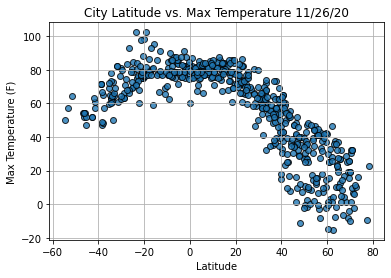

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

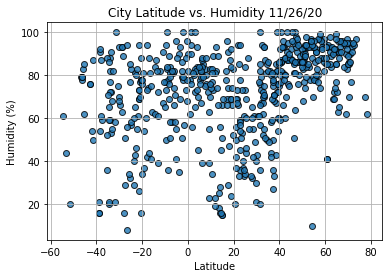

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()